In [ ]:
#Paketleri yüklüyoruz.

In [ ]:
install.packages("caret") #Verileri parçalamak için eklememiz gereken kütüphane

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("clusterSim") #Normalizasyon için

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘ade4’, ‘R2HTML’




In [ ]:
install.packages("class") #Makine öğrenmesi  için

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("chron") #Tarihi dönüştürmek için eklenmişti

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




In [ ]:
install.packages("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('e1071') #SVR için

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Paketleri projeye dahil ediyoruz.

In [ ]:
library("caret")

In [ ]:
library("clusterSim")

Loading required package: cluster

Loading required package: MASS



In [ ]:
library("class")

In [ ]:
library("chron")

In [ ]:
library("GGally") #ggcor icin yani korelasyon grafigi icin.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
library("plotrix")

In [ ]:
library("randomForest")

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
library('e1071')

In [ ]:
library("MASS") #stepAIC icin

In [ ]:
#Veri setini indirip okuyoruz.

In [ ]:
#Kaggle Dataset Link : https://www.kaggle.com/datasets/rojour/boston-results

In [ ]:
#kaggle datasets download -d rojour/boston-results

In [ ]:
m1 = as.data.frame(read.csv("/content/marathon_results_2015.csv"), header=TRUE, sep=',', dec='.')

In [ ]:
m2 = as.data.frame(read.csv("/content/marathon_results_2016.csv"), header=TRUE, sep=',', dec='.')

In [ ]:
m3 = as.data.frame(read.csv("/content/marathon_results_2017.csv"), header=TRUE, sep=',', dec='.')

In [ ]:
#Birleştirmeden önceden stün sayıları eşitmi onu kontrol etmek için bakıyoruz.

In [ ]:
stunSayisi = c(ncol(m1),ncol(m2),ncol(m3))

In [ ]:
stunSayisi

[1] 25 24 25

In [ ]:
#Farklılık yaratan stünü buluyoruz.

In [ ]:
setdiff(colnames(m1),colnames(m2))

[1] "X.1"

In [ ]:
setdiff(colnames(m3),colnames(m2))

[1] "X.1"

In [ ]:
#Farklılık yaratan stünları verimizden çıkarıyoruz.

In [ ]:
m1 = m1[-grep("X.1", colnames(m1))]

In [ ]:
m3 = m3[-grep("X.1", colnames(m3))]

In [ ]:
#Tekrar stünları kontrol ediyoruz.

In [ ]:
setdiff(colnames(m1),colnames(m2))

character(0)

In [ ]:
stunSayisi = c(ncol(m1),ncol(m2),ncol(m3))

In [ ]:
stunSayisi

[1] 24 24 24

In [ ]:
#Veri setlerini birleştiriyoruz.rbind ile verileri satir olarak alt alta ekliyoruz.

In [ ]:
marathon = rbind(m1,m2,m3)

In [ ]:
#Satır sayılarını kontrol ediyoruz.

In [ ]:
nrow(marathon)

[1] 79638

In [ ]:
sum(nrow(m1),nrow(m2),nrow(m3))

[1] 79638

In [ ]:
#Veri setimizi tanıyoruz.

In [ ]:
summary(marathon)

      X                 Bib                Name                Age       
 Length:79638       Length:79638       Length:79638       Min.   :18.00  
 Class :character   Class :character   Class :character   1st Qu.:34.00  
 Mode  :character   Mode  :character   Mode  :character   Median :42.00  
                                                          Mean   :42.42  
                                                          3rd Qu.:50.00  
                                                          Max.   :84.00  
     M.F                City              State             Country         
 Length:79638       Length:79638       Length:79638       Length:79638      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [ ]:
head(marathon)

,X,Bib,Name,Age,M.F,City,State,Country,Citizen,X5K,⋯,X25K,X30K,X35K,X40K,Pace,Proj.Time,Official.Time,Overall,Gender,Division
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,0,3,"Desisa, Lelisa",25,M,Ambo,,ETH,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
2,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,,ETH,,0:14:43,⋯,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
3,2,8,"Chebet, Wilson",29,M,Marakwet,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
4,3,11,"Kipyego, Bernard",28,M,Eldoret,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
5,4,10,"Korir, Wesley",32,M,Kitale,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
6,5,9,"Chepkwony, Frankline",30,M,Koibatek,,KEN,,0:14:44,⋯,1:16:07,1:32:00,1:47:59,2:03:18,0:05:00,-,2:10:52,6,6,6


In [ ]:
tail(marathon)

,X,Bib,Name,Age,M.F,City,State,Country,Citizen,X5K,⋯,X25K,X30K,X35K,X40K,Pace,Proj.Time,Official.Time,Overall,Gender,Division
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
79633,26404,25141,"Quinn, Adam H.",19,M,Belmont,MI,USA,,0:35:14,⋯,4:01:11,4:42:59,5:33:15,6:42:51,0:16:12,-,7:04:33,26406,14435,4773
79634,26405,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,,0:46:44,⋯,4:12:06,5:03:08,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344
79635,26406,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,,0:32:03,⋯,3:50:19,4:50:01,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774
79636,26407,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,,0:53:11,⋯,4:15:21,5:06:37,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698
79637,26408,25268,"Reilly, Bill",64,M,New York,NY,USA,,0:40:34,⋯,4:06:10,5:07:09,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043
79638,26409,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,,0:39:36,⋯,4:27:14,5:37:13,6:39:07,7:41:23,0:18:15,-,7:58:14,26411,14438,2553


In [ ]:
#NA veya tekrar etmiş mi kontrolunu yapıyoruz.

In [ ]:
anyNA(marathon)

[1] FALSE

In [ ]:
anyDuplicated(marathon)

[1] 0

In [ ]:
#Verilerimizi dosyaya yazıyoruz.

In [ ]:
write.csv(marathon,file="/content/marathon_results_15_16_17.csv")

In [ ]:
#Verilerimizin tamamını View ile görebiliriz.

In [ ]:
View(marathon)

X,Bib,Name,Age,M.F,City,State,Country,Citizen,X5K,⋯,X25K,X30K,X35K,X40K,Pace,Proj.Time,Official.Time,Overall,Gender,Division
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
0,3,"Desisa, Lelisa",25,M,Ambo,,ETH,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,,ETH,,0:14:43,⋯,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,,KEN,,0:14:43,⋯,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
5,9,"Chepkwony, Frankline",30,M,Koibatek,,KEN,,0:14:44,⋯,1:16:07,1:32:00,1:47:59,2:03:18,0:05:00,-,2:10:52,6,6,6
6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,,0:14:45,⋯,1:16:05,1:31:59,1:48:06,2:04:05,0:05:01,-,2:11:20,7,7,7
7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,,0:14:44,⋯,1:16:07,1:31:59,1:47:59,2:04:58,0:05:04,-,2:12:42,8,8,8
8,5,"Tola, Tadese",27,M,Addis Ababa,,ETH,,0:14:43,⋯,1:16:07,1:32:00,1:48:00,2:04:39,0:05:06,-,2:13:35,9,9,9


In [ ]:
#Verilerimiz görselleştiriyoruz.

In [ ]:
#Barplot ile stün grafiği şeklinde gösterim yapacağız.

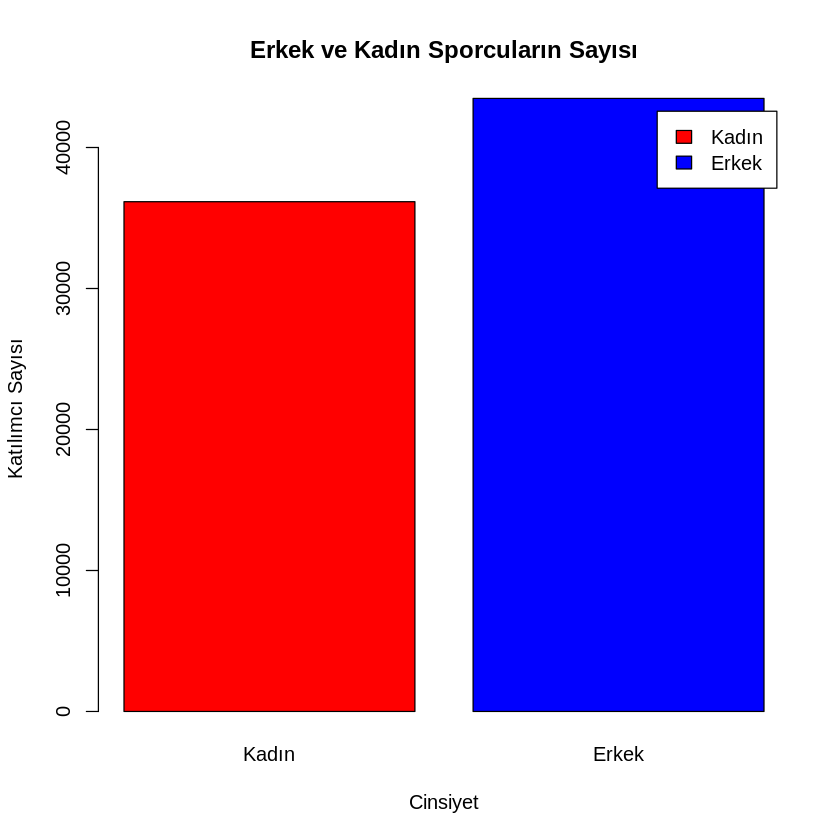

In [ ]:
barplot(table(marathon$M.F),main="Erkek ve Kadın Sporcuların Sayısı",xlab="Cinsiyet",ylab="Katılımcı Sayısı",names.arg=c("Kadın","Erkek"),,col=c("red","blue"), legend=c("Kadın","Erkek"))

In [ ]:
#Grafiklerin cikstisini almak icin asagidaki adimlari uygulayarak yaptik.
#1#jpeg("~/Pictures/EKKS.jpg")
#2#barplot(table(marathon$M.F),main="Erkek ve Kadın Sporcuların Sayısı",xlab="Cinsiyet",ylab="Katılımcı Sayısı",names.arg=c("Kadın","Erkek"),,col=c("red","blue"), legend=c("Kadın","Erkek"))
#3#dev.off()

#2. adimda her bir cizim icin kodlar degisiyor.
#1. adimda dosya isminde degisiklik yapiyoruz. 

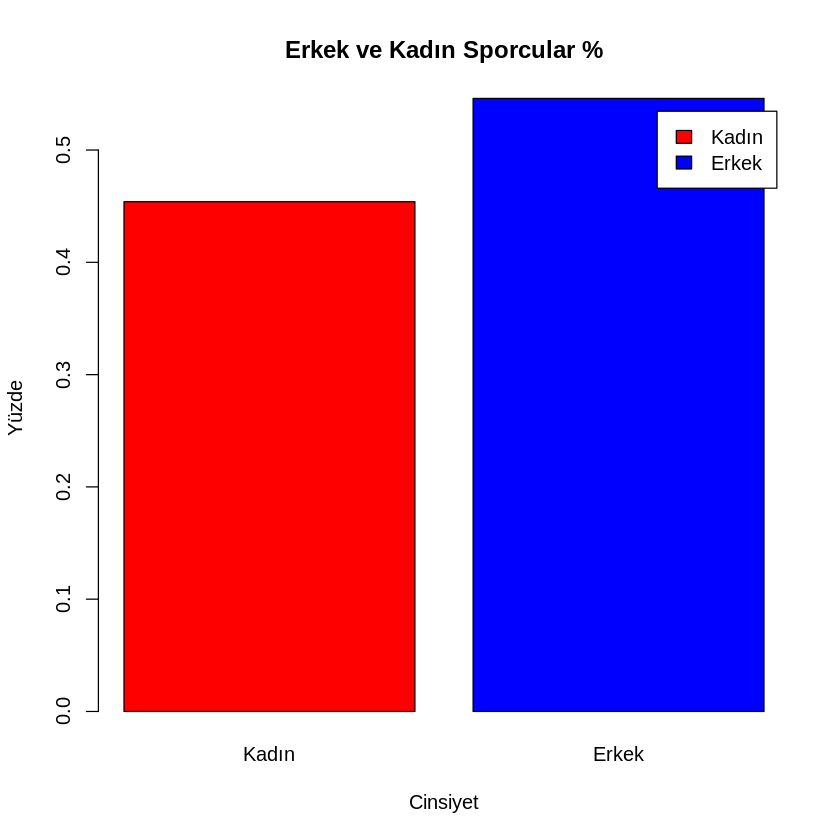

In [ ]:
barplot(table(marathon$M.F)/nrow(marathon),main="Erkek ve Kadın Sporcular %",xlab="Cinsiyet",ylab="Yüzde",names.arg=c("Kadın","Erkek"),col=c("red","blue"), legend=c("Kadın","Erkek"))

In [ ]:
#Pie ile pasta dilimi şeklinde gösterim yapacağız.

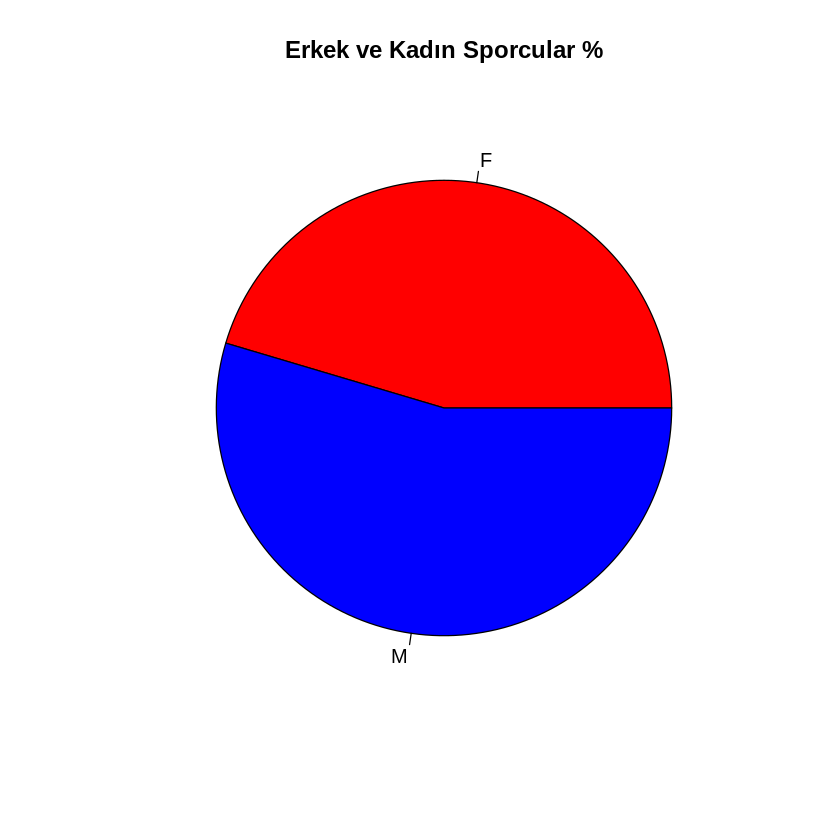

In [ ]:
pie(table(marathon$M.F)/nrow(marathon), main="Erkek ve Kadın Sporcular %",col=c("red","blue"))

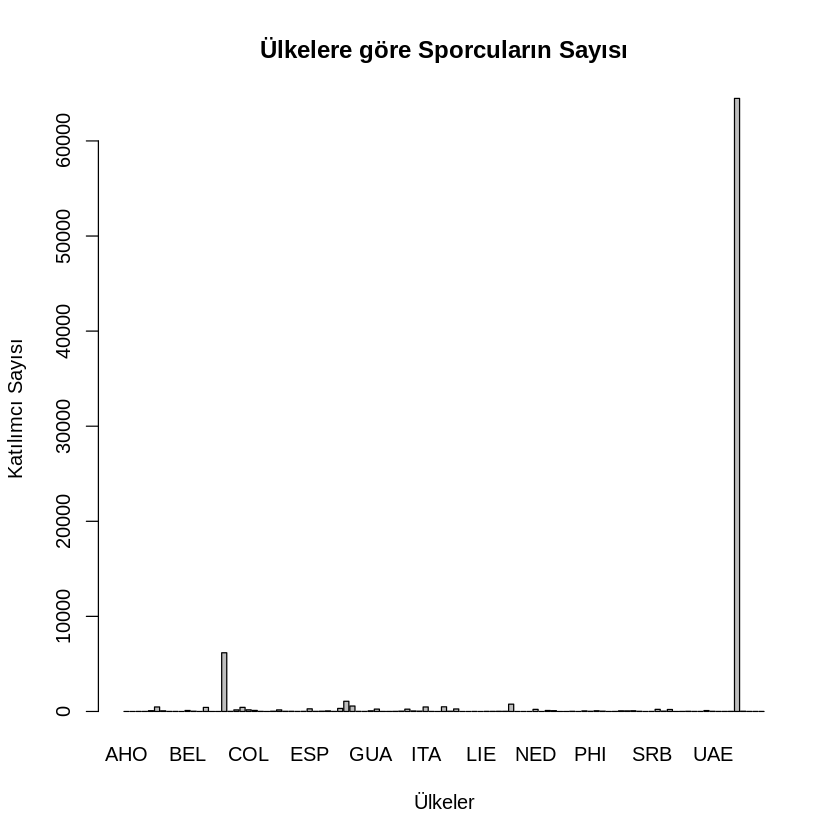

In [ ]:
barplot(table(marathon$Country),main="Ülkelere göre Sporcuların Sayısı",xlab="Ülkeler",ylab="Katılımcı Sayısı")

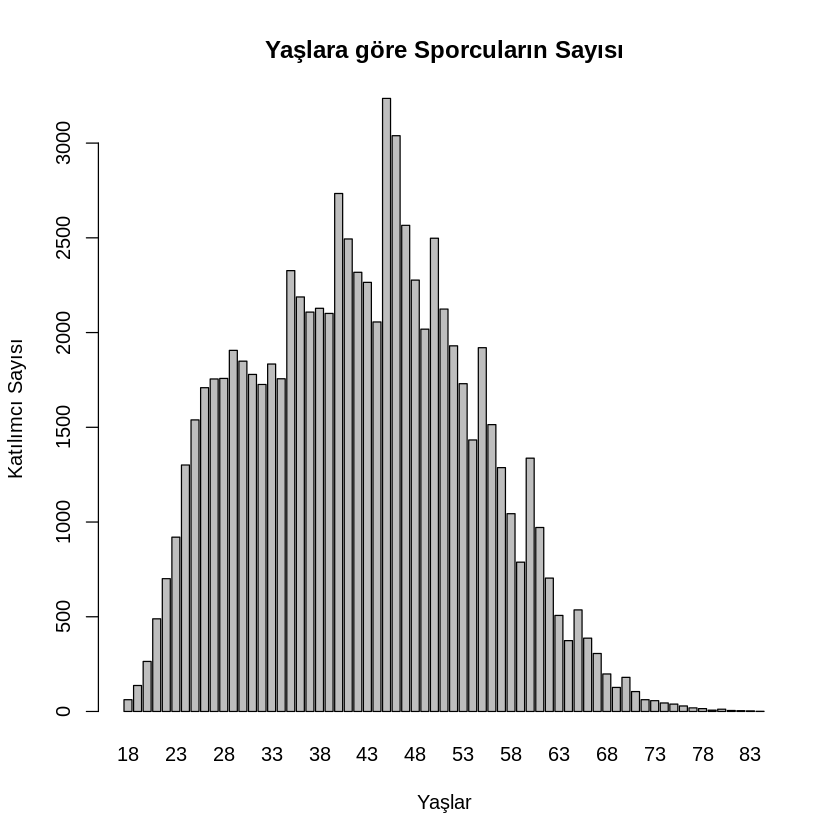

In [ ]:
barplot(table(marathon$Age),main="Yaşlara göre Sporcuların Sayısı",xlab="Yaşlar",ylab="Katılımcı Sayısı")

In [ ]:
#Histogram grafiği çizdirmek için

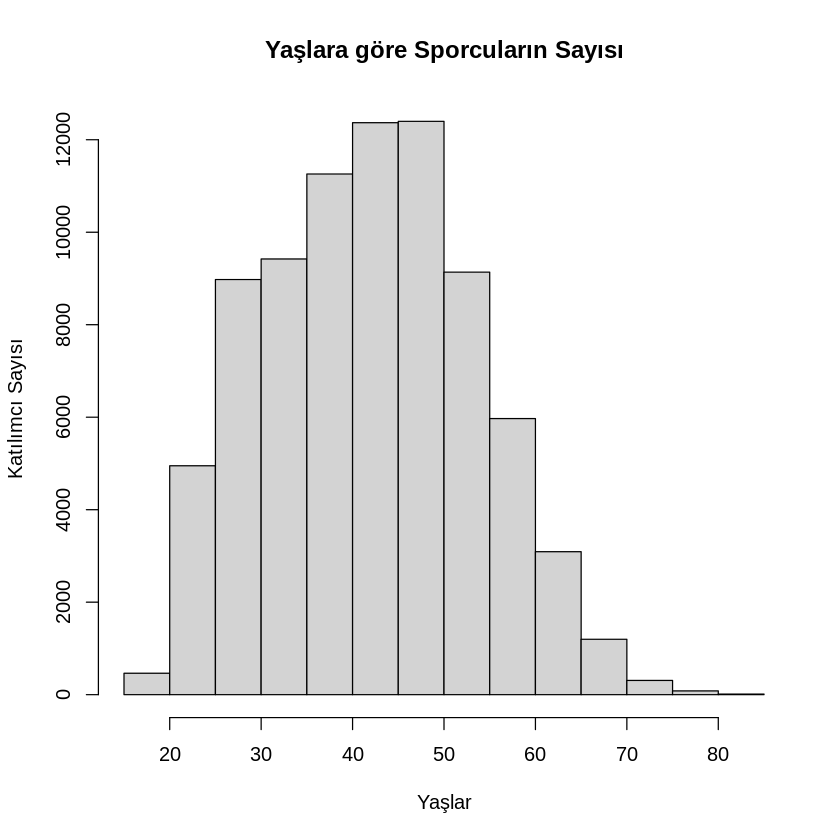

In [ ]:
hist(marathon$Age, main="Yaşlara göre Sporcuların Sayısı",xlab="Yaşlar",ylab="Katılımcı Sayısı")

In [ ]:
#Histogram grafiğini yüzde olarak görmek için freq = FALSE olarak atadık.

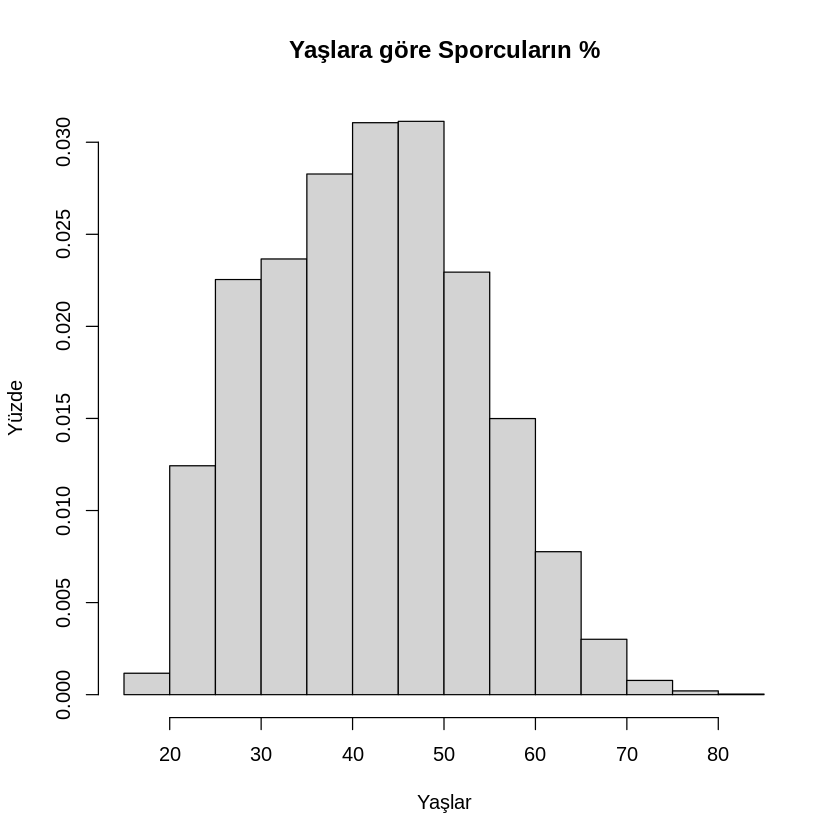

In [ ]:
hist(marathon$Age, main="Yaşlara göre Sporcuların %", freq = FALSE,xlab="Yaşlar",ylab="Yüzde")

In [ ]:
#Stün isimlerini görmek için buna göre bizler bazı verilerimiz ile işlem yapacağız.

In [ ]:
colnames(marathon)

[1] "X"             "Bib"           "Name"          "Age"          
 [5] "M.F"           "City"          "State"         "Country"      
 [9] "Citizen"       "X5K"           "X10K"          "X15K"         
[13] "X20K"          "Half"          "X25K"          "X30K"         
[17] "X35K"          "X40K"          "Pace"          "Proj.Time"    
[21] "Official.Time" "Overall"       "Gender"        "Division"

In [ ]:
danismanli = as.data.frame(marathon[c(4,10,11,12,13,14,15,16,17,18,21,22,23,24)])

In [ ]:
#Verimizde boş veya eksik değerler var ise bunu tespit edip ilgili satırı sileceğiz.

In [ ]:
danismanli[danismanli == "-"] = NA

In [ ]:
danismanli[danismanli == ""] = NA

In [ ]:
danismanli[danismanli == " "] = NA

In [ ]:
danismanli = na.omit(danismanli) #NA olan tüm değerleri silmek için

In [ ]:
#Kaç satır verimizden silindiğini görmek için

In [ ]:
print( nrow( marathon ) - nrow( danismanli ) )

[1] 600


In [ ]:
View(danismanli)

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K,Official.Time,Overall,Gender,Division
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,25,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,2:09:17,1,1,1
2,30,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,2:09:48,2,2,2
3,29,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,2:10:22,3,3,3
4,28,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,2:10:47,4,4,4
5,32,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,2:10:49,5,5,5
6,30,0:14:44,0:29:45,0:44:59,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:18,2:10:52,6,6,6
7,32,0:14:45,0:29:45,0:45:20,1:00:43,1:04:03,1:16:05,1:31:59,1:48:06,2:04:05,2:11:20,7,7,7
8,39,0:14:44,0:29:44,0:44:59,1:00:30,1:04:02,1:16:07,1:31:59,1:47:59,2:04:58,2:12:42,8,8,8
9,27,0:14:43,0:29:43,0:44:58,1:00:28,1:04:02,1:16:07,1:32:00,1:48:00,2:04:39,2:13:35,9,9,9


In [ ]:
write.csv(danismanli,file="/content/marathon_results_15_16_17_cl.csv")

In [ ]:
#Korelasyon grafiğini çizdirerek verilerin birbirleri ile olan ilişkilerine bakacağız.

Warning message in ggcorr(danismanli):
“data in column(s) 'X5K', 'X10K', 'X15K', 'X20K', 'Half', 'X25K', 'X30K', 'X35K', 'X40K', 'Official.Time' are not numeric and were ignored”


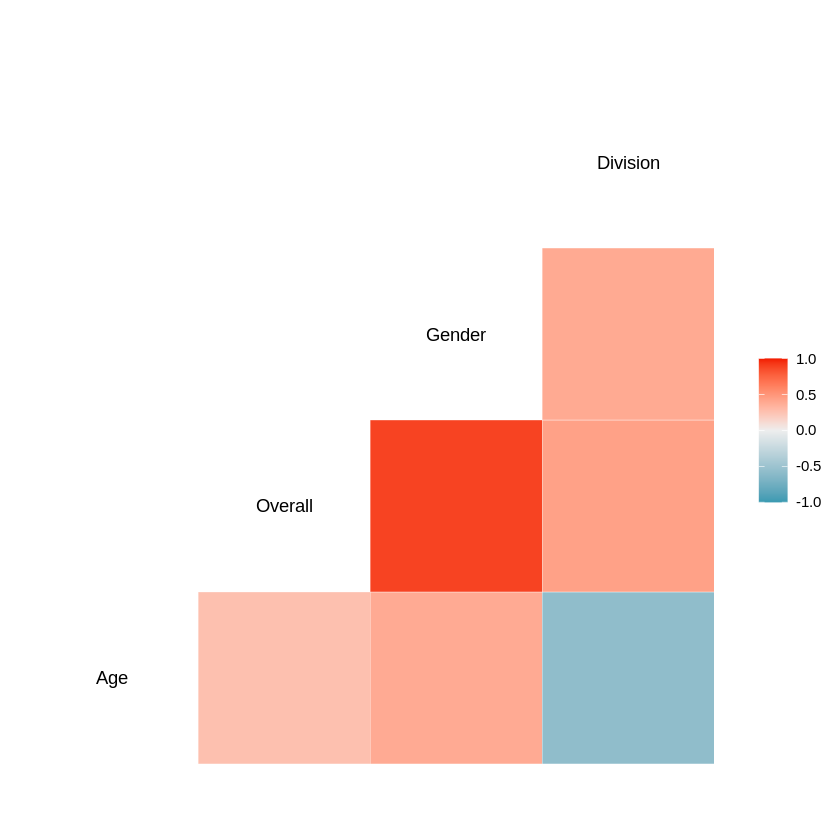

In [ ]:
ggcorr(danismanli)

In [ ]:
cor(danismanli$Overall, danismanli$Gender) #Korelasyon varmı cor ile hesaplayıpta görebiliriz.

[1] 0.8912121

In [ ]:
#Verilerin nasıl dağıldığını göstermek için scatter.smooth kullandık.

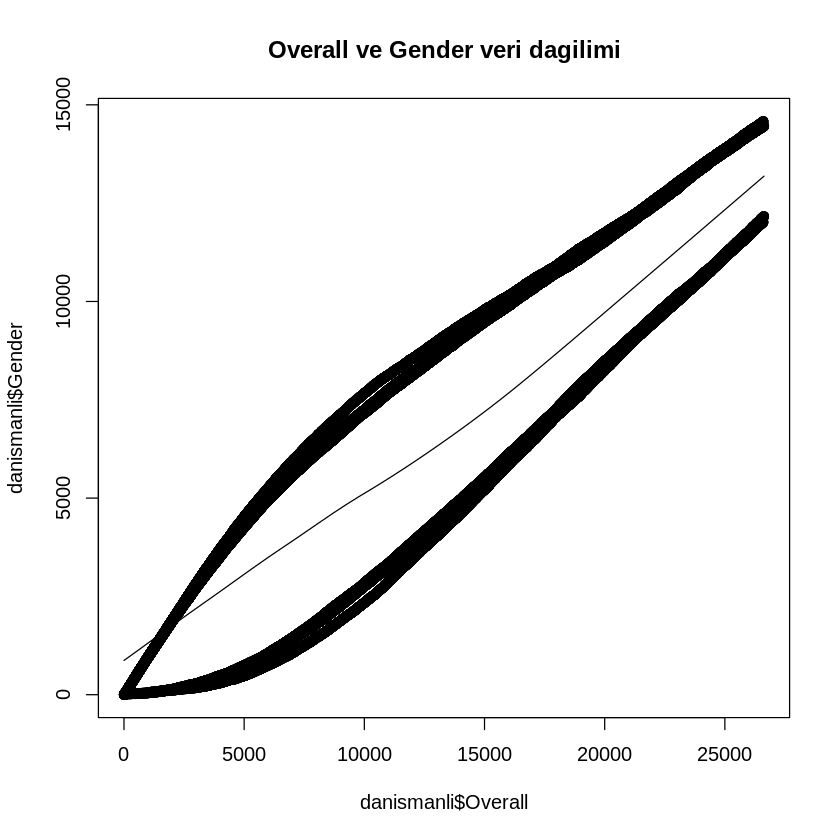

In [ ]:
scatter.smooth(x =danismanli$Overall, y=danismanli$Gender, main ="Overall ve Gender veri dagilimi")

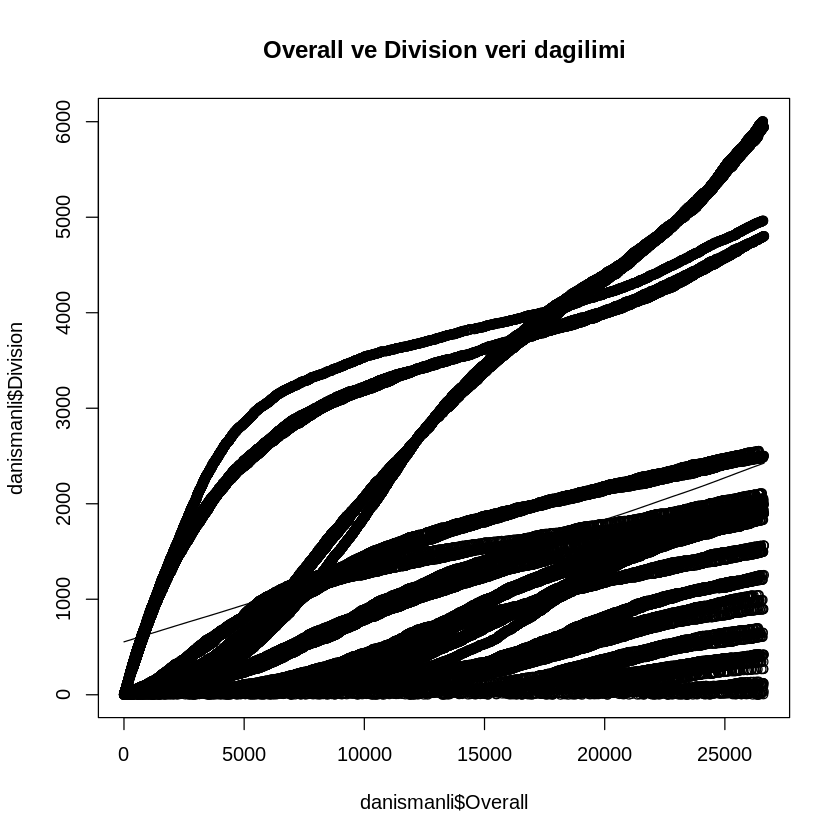

In [ ]:
scatter.smooth(x =danismanli$Overall, y=danismanli$Division, main ="Overall ve Division veri dagilimi")

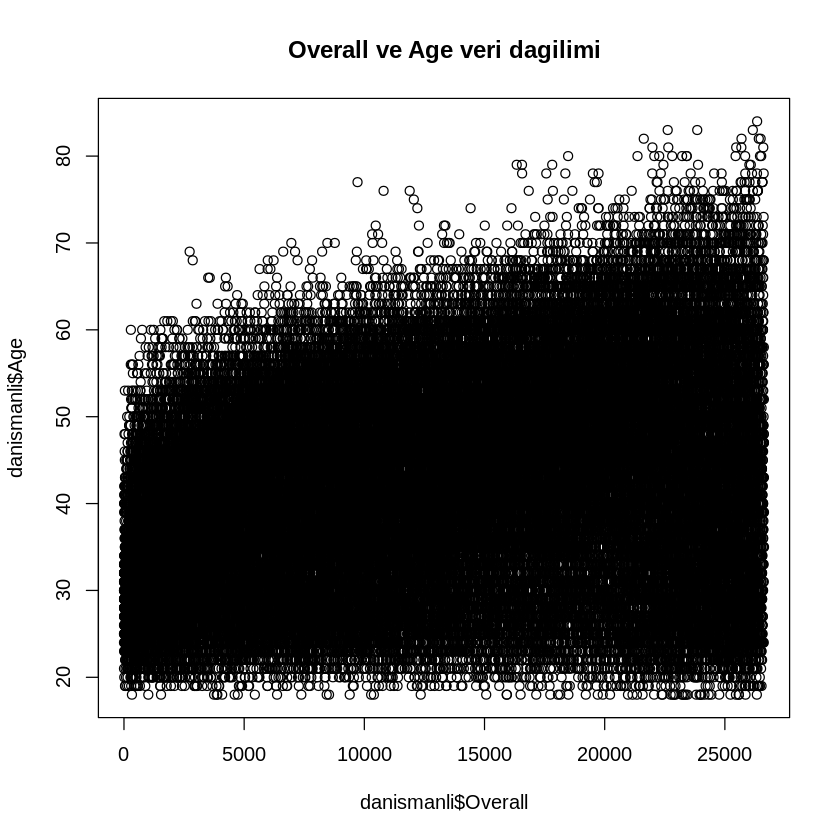

In [ ]:
scatter.smooth(x =danismanli$Overall, y=danismanli$Age, main ="Overall ve Age veri dagilimi")

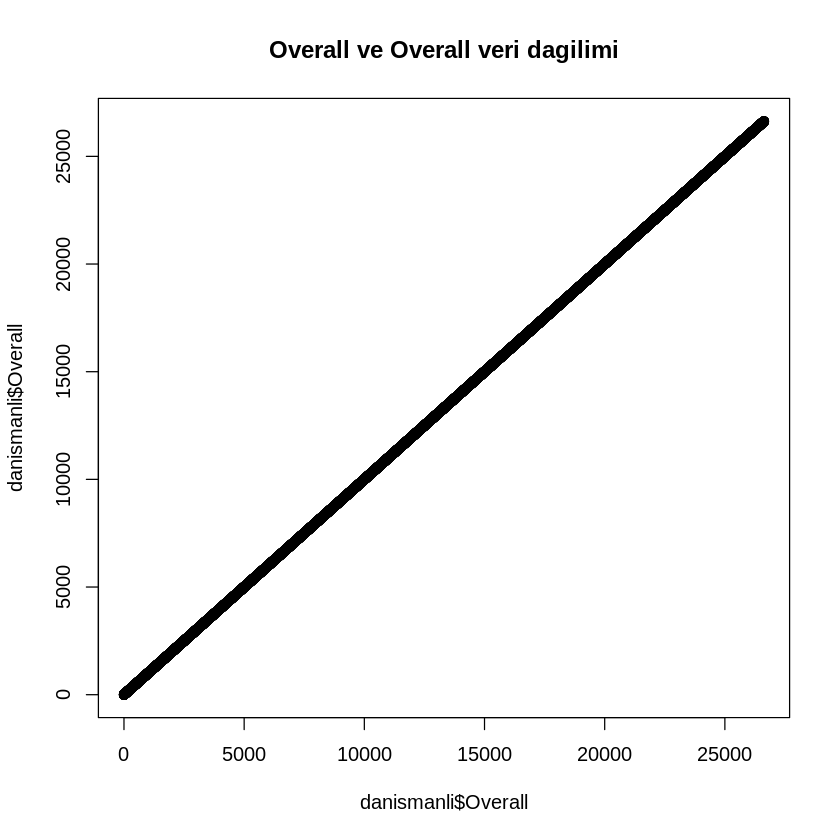

In [ ]:
scatter.smooth(x =danismanli$Overall, y=danismanli$Overall, main ="Overall ve Overall veri dagilimi")

In [ ]:
danismansiz = as.data.frame(danismanli[1:10])

In [ ]:
View(danismansiz)

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,25,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39
2,30,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42
3,29,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01
4,28,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47
5,32,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27
6,30,0:14:44,0:29:45,0:44:59,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:18
7,32,0:14:45,0:29:45,0:45:20,1:00:43,1:04:03,1:16:05,1:31:59,1:48:06,2:04:05
8,39,0:14:44,0:29:44,0:44:59,1:00:30,1:04:02,1:16:07,1:31:59,1:47:59,2:04:58
9,27,0:14:43,0:29:43,0:44:58,1:00:28,1:04:02,1:16:07,1:32:00,1:48:00,2:04:39


In [ ]:
#Not: Pekiştirmeli ve karma modeller kullanılmamıştır.

In [ ]:
#Bizler için şimdilik 10 000 veri yeterli olduğundan rastegele 10 000 satır alacağız.

In [ ]:
rastgele_dan = danismanli[sample(nrow(danismanli),10000), ]

In [ ]:
#Kaç satır aldığımızı görmek için

In [ ]:
nrow(rastgele_dan)

[1] 10000

In [ ]:
#Verileri normalleştirmek için

In [ ]:
rastgele_dsz = danismansiz[sample(nrow(danismansiz),10000), ]

In [ ]:
View(rastgele_dan)

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K,Official.Time,Overall,Gender,Division
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
61396,34,0:25:36,0:50:41,1:16:19,1:41:07,1:46:26,2:05:51,2:31:15,2:56:47,3:24:09,3:34:17,8169,1962,1529
33856,28,0:23:46,0:48:02,1:12:27,1:37:19,1:42:46,2:02:03,2:27:37,2:53:16,3:18:13,3:28:30,7257,1494,1196
48735,49,0:29:43,0:58:01,1:27:25,1:57:20,2:03:44,2:27:45,3:03:01,3:40:38,4:17:53,4:32:43,22136,12463,2261
29257,31,0:20:44,0:41:13,1:02:23,1:22:57,1:27:27,1:44:27,2:08:12,2:32:14,2:56:53,3:08:39,2659,2440,1674
43305,45,0:26:42,0:53:59,1:21:21,1:48:58,1:54:56,2:16:37,2:45:41,3:16:23,3:46:40,3:59:39,16706,6504,895
21887,25,0:33:38,1:05:41,1:36:34,2:06:23,2:12:47,2:36:44,3:07:38,3:38:35,4:07:06,4:20:20,21887,12507,4388
45538,43,0:29:12,0:55:42,1:22:48,1:51:32,1:57:31,2:22:28,2:53:33,3:27:32,3:58:03,4:10:43,18939,7872,1403
23978,34,0:31:29,1:01:52,1:31:36,2:10:19,2:17:20,2:44:18,3:19:20,3:54:17,4:28:37,4:42:41,23978,10527,5219
72145,25,0:25:49,0:51:14,1:18:25,1:45:10,1:51:02,2:15:19,2:48:48,3:22:03,4:02:21,4:16:42,18918,7817,4154


In [ ]:
View(rastgele_dsz)

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
38260,53,0:24:59,0:49:42,1:14:18,1:39:25,1:44:51,2:05:07,2:31:14,2:57:50,3:27:54
74251,60,0:27:01,0:56:01,1:24:27,1:54:10,2:00:21,2:24:38,2:59:50,3:35:33,4:15:58
49869,53,0:29:42,0:58:48,1:28:15,1:58:51,2:05:19,2:30:18,3:07:15,3:47:31,4:27:39
79251,59,0:32:35,1:05:19,1:40:51,2:22:47,2:31:25,3:10:27,3:53:15,4:42:07,5:28:09
49198,54,0:31:07,1:01:48,1:33:17,2:04:25,2:11:01,2:36:04,3:10:09,3:44:32,4:21:09
77532,60,0:33:16,1:06:21,1:39:30,2:13:30,2:20:46,2:48:34,3:25:36,4:07:34,4:48:19
29402,21,0:19:15,0:38:36,0:58:12,1:18:43,1:23:17,1:39:56,2:03:49,2:29:00,2:57:33
33955,37,0:23:56,0:47:32,1:11:14,1:35:21,1:40:35,1:59:35,2:25:01,2:51:41,3:17:46
53992,24,0:18:21,0:36:58,0:55:58,1:15:31,1:19:49,1:35:49,1:57:03,2:19:44,2:42:47


In [ ]:
normal_danisan = data.Normalization(x= rastgele_dan, type="n4", normalization = "column")

Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dan, type = "n4", normalization = "column"):
“Data not numeric, normalization n

In [ ]:
normal_danisan

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K,Official.Time,Overall,Gender,Division
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
61396,0.25,0:25:36,0:50:41,1:16:19,1:41:07,1:46:26,2:05:51,2:31:15,2:56:47,3:24:09,3:34:17,0.306871548258632,0.134499314128944,0.254709118186364
33856,0.15625,0:23:46,0:48:02,1:12:27,1:37:19,1:42:46,2:02:03,2:27:37,2:53:16,3:18:13,3:28:30,0.272607731900665,0.102400548696845,0.199199866644441
48735,0.484375,0:29:43,0:58:01,1:27:25,1:57:20,2:03:44,2:27:45,3:03:01,3:40:38,4:17:53,4:32:43,0.83161137618815,0.854732510288066,0.376729454909152
29257,0.203125,0:20:44,0:41:13,1:02:23,1:22:57,1:27:27,1:44:27,2:08:12,2:32:14,2:56:53,3:08:39,0.0998609910959161,0.167283950617284,0.278879813302217
43305,0.421875,0:26:42,0:53:59,1:21:21,1:48:58,1:54:56,2:16:37,2:45:41,3:16:23,3:46:40,3:59:39,0.627606416951572,0.4460219478738,0.149024837472912
21887,0.109375,0:33:38,1:05:41,1:36:34,2:06:23,2:12:47,2:36:44,3:07:38,3:38:35,4:07:06,4:20:20,0.822256452643048,0.857750342935528,0.731288548091349
45538,0.390625,0:29:12,0:55:42,1:22:48,1:51:32,1:57:31,2:22:28,2:53:33,3:27:32,3:58:03,4:10:43,0.711500169064883,0.539849108367627,0.233705617602934
23978,0.25,0:31:29,1:01:52,1:31:36,2:10:19,2:17:20,2:44:18,3:19:20,3:54:17,4:28:37,4:42:41,0.900815268437465,0.721947873799726,0.869811635272545
72145,0.109375,0:25:49,0:51:14,1:18:25,1:45:10,1:51:02,2:15:19,2:48:48,3:22:03,4:02:21,4:16:42,0.710711199609272,0.536076817558299,0.692282047007835


In [ ]:
normal_dansz = data.Normalization(x= rastgele_dsz, type="n4", normalization = "column")

Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization not applicable”
Warning message in data.Normalization(x = rastgele_dsz, type = "n4", normalization = "column"):
“Data not numeric, normalization n

In [ ]:
normal_dansz

,Age,X5K,X10K,X15K,X20K,Half,X25K,X30K,X35K,X40K
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
38260,0.538461538461538,0:24:59,0:49:42,1:14:18,1:39:25,1:44:51,2:05:07,2:31:14,2:57:50,3:27:54
74251,0.646153846153846,0:27:01,0:56:01,1:24:27,1:54:10,2:00:21,2:24:38,2:59:50,3:35:33,4:15:58
49869,0.538461538461538,0:29:42,0:58:48,1:28:15,1:58:51,2:05:19,2:30:18,3:07:15,3:47:31,4:27:39
79251,0.630769230769231,0:32:35,1:05:19,1:40:51,2:22:47,2:31:25,3:10:27,3:53:15,4:42:07,5:28:09
49198,0.553846153846154,0:31:07,1:01:48,1:33:17,2:04:25,2:11:01,2:36:04,3:10:09,3:44:32,4:21:09
77532,0.646153846153846,0:33:16,1:06:21,1:39:30,2:13:30,2:20:46,2:48:34,3:25:36,4:07:34,4:48:19
29402,0.0461538461538462,0:19:15,0:38:36,0:58:12,1:18:43,1:23:17,1:39:56,2:03:49,2:29:00,2:57:33
33955,0.292307692307692,0:23:56,0:47:32,1:11:14,1:35:21,1:40:35,1:59:35,2:25:01,2:51:41,3:17:46
53992,0.0923076923076923,0:18:21,0:36:58,0:55:58,1:15:31,1:19:49,1:35:49,1:57:03,2:19:44,2:42:47


In [ ]:
#Verileri test ve eğitim olarak ayırıyoruz.

In [ ]:
egitimIndis_dan = createDataPartition(y=rastgele_dan$Overall,p=.70,list=FALSE)

In [ ]:
nrow(egitimIndis_dan)

[1] 7000

In [ ]:
egitimIndis_dsz = createDataPartition(y=rastgele_dsz$Age,p=.70,list=FALSE)

In [ ]:
#testIndis = createDataPartition(y=rastgele$Gender,p=0.30,list=FALSE)

In [ ]:
egitim_dan = rastgele_dan[egitimIndis_dan, ]

In [ ]:
test_dan = rastgele_dan[-egitimIndis_dan, ]

In [ ]:
egitim_dsz = rastgele_dsz[egitimIndis_dsz, ]

In [ ]:
test_dsz = rastgele_dsz[-egitimIndis_dsz, ]

In [ ]:
#Lineer Regression

In [ ]:
lineer_dan = lm(egitim_dan$Overall ~ egitim_dan$Gender,data=egitim_dan)

In [ ]:
summary(lineer_dan)


Call:
lm(formula = egitim_dan$Overall ~ egitim_dan$Gender, data = egitim_dan)

Residuals:
    Min      1Q  Median      3Q     Max 
-5022.0 -3370.9  -960.6  3770.1  4401.6 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.645e+03  8.210e+01   20.04   <2e-16 ***
egitim_dan$Gender 1.732e+00  1.061e-02  163.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3477 on 6998 degrees of freedom
Multiple R-squared:  0.792,	Adjusted R-squared:  0.792 
F-statistic: 2.665e+04 on 1 and 6998 DF,  p-value: < 2.2e-16


In [ ]:
testVeri = as.data.frame(x = 26407)

In [ ]:
tahmin = predict(lineer_dan, testVeri, interval = "confidence")

Warning message:
“'newdata' had 1 row but variables found have 7000 rows”


In [ ]:
print(round(mean(tahmin)))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

[1] 13205


In [ ]:
sigma(lineer_dan) #RSS==Residual Standart Error gosterir.

[1] 3476.611

In [ ]:
AIC(lineer_dan) #Deger dusuk olmalidir.

[1] 134022.5

In [ ]:
stepAIC(lineer_dan)

Start:  AIC=114155.4
egitim_dan$Overall ~ egitim_dan$Gender

                    Df  Sum of Sq        RSS    AIC
<none>                            8.4584e+10 114155
- egitim_dan$Gender  1 3.2211e+11 4.0670e+11 125146



Call:
lm(formula = egitim_dan$Overall ~ egitim_dan$Gender, data = egitim_dan)

Coefficients:
      (Intercept)  egitim_dan$Gender  
         1645.013              1.732  


In [ ]:
confusionMatrix(lineer_dan)

ERROR: ignored

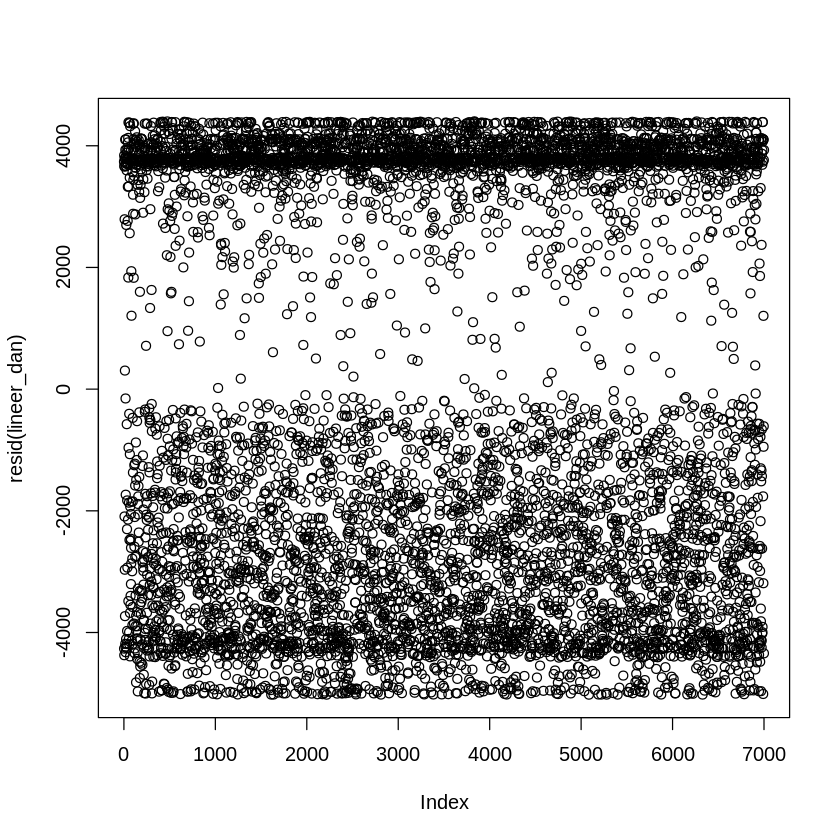

In [ ]:
plot(resid(lineer_dan)) #Kalintirlari cizdirmek icin

In [ ]:
#Logistic Regression

In [ ]:
logistic_dan = glm(egitim_dan$Overall ~ egitim_dan$Gender, data=egitim_dan, family = "Gamma")

In [ ]:
summary(logistic_dan)


Call:
glm(formula = egitim_dan$Overall ~ egitim_dan$Gender, family = "Gamma", 
    data = egitim_dan)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4508  -0.3562  -0.0221   0.3873   0.5497  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.594e-04  1.133e-06  140.62   <2e-16 ***
egitim_dan$Gender -9.630e-09  1.003e-10  -96.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.1999145)

    Null deviance: 4231.7  on 6999  degrees of freedom
Residual deviance: 2424.2  on 6998  degrees of freedom
AIC: 141456

Number of Fisher Scoring iterations: 5


In [ ]:
colnames(test_dan)

[1] "Age"           "X5K"           "X10K"          "X15K"         
 [5] "X20K"          "Half"          "X25K"          "X30K"         
 [9] "X35K"          "X40K"          "Official.Time" "Overall"      
[13] "Gender"        "Division"

In [ ]:
tahminSinif = predict(logistic_dan, type="response", newdata=test_dan[,-11])

Warning message:
“'newdata' had 3000 rows but variables found have 7000 rows”


In [ ]:
tahmin = table(tahminSinif, egitim_dan$Overall, dnn= c("Tahmin", "Gercek"))

In [ ]:
hata = mean(tahminSinif != test_dan$Overall)

Warning message in tahminSinif != test_dan$Overall:
“longer object length is not a multiple of shorter object length”


In [ ]:
hata = round(hata, 2)

In [ ]:
print(hata)

[1] 1


In [ ]:
sigma(logistic_dan)

[1] 0.5885741

In [ ]:
AIC(logistic_dan)

[1] 141455.7

In [ ]:
stepAIC(logistic_dan)

Start:  AIC=141455.6
egitim_dan$Overall ~ egitim_dan$Gender

                    Df Deviance    AIC
<none>                   2424.2 141456
- egitim_dan$Gender  1   4231.7 150495



Call:  glm(formula = egitim_dan$Overall ~ egitim_dan$Gender, family = "Gamma", 
    data = egitim_dan)

Coefficients:
      (Intercept)  egitim_dan$Gender  
        1.594e-04         -9.630e-09  

Degrees of Freedom: 6999 Total (i.e. Null);  6998 Residual
Null Deviance:	    4232 
Residual Deviance: 2424 	AIC: 141500

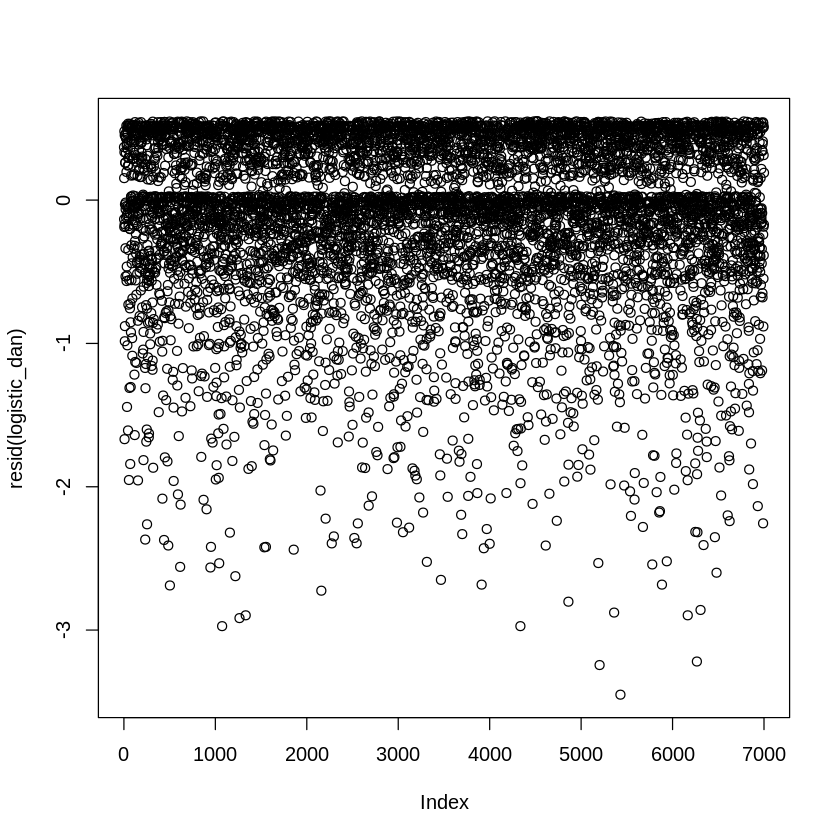

In [ ]:
plot(resid(logistic_dan)) #Kalintirlari cizdirmek icin

In [ ]:
#Multiple Regression

In [ ]:
multiple_dan = lm(egitim_dan$Overall~egitim_dan$Gender + egitim_dan$Division + egitim_dan$Age ,data=egitim_dan)

In [ ]:
summary(multiple_dan)


Call:
lm(formula = egitim_dan$Overall ~ egitim_dan$Gender + egitim_dan$Division + 
    egitim_dan$Age, data = egitim_dan)

Residuals:
    Min      1Q  Median      3Q     Max 
-6010.3 -3247.5  -617.3  3377.2  5376.9 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.253e+03  3.052e+02   4.104  4.1e-05 ***
egitim_dan$Gender   1.654e+00  1.922e-02  86.090  < 2e-16 ***
egitim_dan$Division 5.656e-01  5.889e-02   9.605  < 2e-16 ***
egitim_dan$Age      2.442e-01  7.471e+00   0.033    0.974    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3396 on 6996 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.8015 
F-statistic:  9421 on 3 and 6996 DF,  p-value: < 2.2e-16


In [ ]:
sigma(multiple_dan)

[1] 3396.261

In [ ]:
AIC(multiple_dan)

[1] 133697.2

In [ ]:
stepAIC(multiple_dan)

Start:  AIC=113830
egitim_dan$Overall ~ egitim_dan$Gender + egitim_dan$Division + 
    egitim_dan$Age

                      Df  Sum of Sq        RSS    AIC
- egitim_dan$Age       1 1.2321e+04 8.0696e+10 113828
<none>                              8.0696e+10 113830
- egitim_dan$Division  1 1.0640e+09 8.1760e+10 113920
- egitim_dan$Gender    1 8.5489e+10 1.6619e+11 118885

Step:  AIC=113828
egitim_dan$Overall ~ egitim_dan$Gender + egitim_dan$Division

                      Df  Sum of Sq        RSS    AIC
<none>                              8.0696e+10 113828
- egitim_dan$Division  1 3.8876e+09 8.4584e+10 114155
- egitim_dan$Gender    1 2.5209e+11 3.3279e+11 123744



Call:
lm(formula = egitim_dan$Overall ~ egitim_dan$Gender + egitim_dan$Division, 
    data = egitim_dan)

Coefficients:
        (Intercept)    egitim_dan$Gender  egitim_dan$Division  
           1262.263                1.655                0.564  


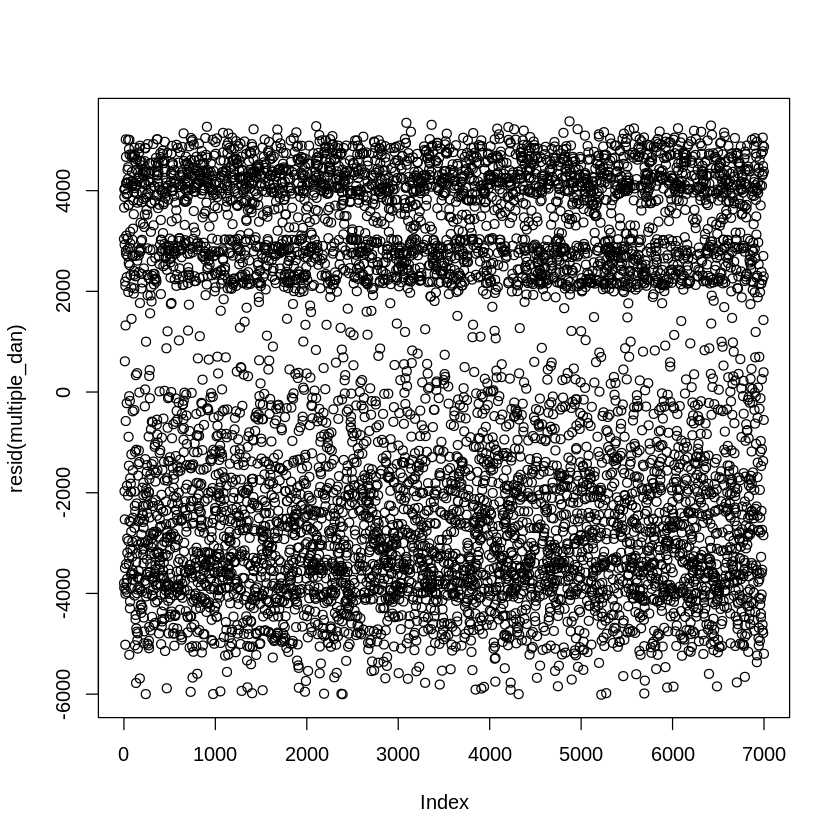

In [ ]:
plot(resid(multiple_dan))

In [ ]:
 #Random Forest

In [ ]:
randomFor_dan = randomForest(x = egitim_dan[-12],y = egitim_dan$Overall,ntree = 50)

In [ ]:
summary(randomFor_dan)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       7000   -none- numeric  
mse               50   -none- numeric  
rsq               50   -none- numeric  
oob.times       7000   -none- numeric  
importance        13   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               7000   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     

In [ ]:
tahmin = predict(randomFor_dan, newdata = as.data.frame(test_dan[-12]))

In [ ]:
sigma(randomFor_dan)

Warning message in nobs.default(object, use.fallback = use.fallback):
“no 'nobs' method is available”


numeric(0)

In [ ]:
#SVR

In [ ]:
svr_dan = svm( egitim_dan$Overall~ egitim_dan$Gender + egitim_dan$Division + egitim_dan$Age, data = egitim_dan, type='eps-regression')

In [ ]:
summary(svr_dan)


Call:
svm(formula = egitim_dan$Overall ~ egitim_dan$Gender + egitim_dan$Division + 
    egitim_dan$Age, data = egitim_dan, type = "eps-regression")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.3333333 
    epsilon:  0.1 


Number of Support Vectors:  4802






In [ ]:
tahmin = predict(svr_dan, newdata = as.data.frame(test_dan[-12]))

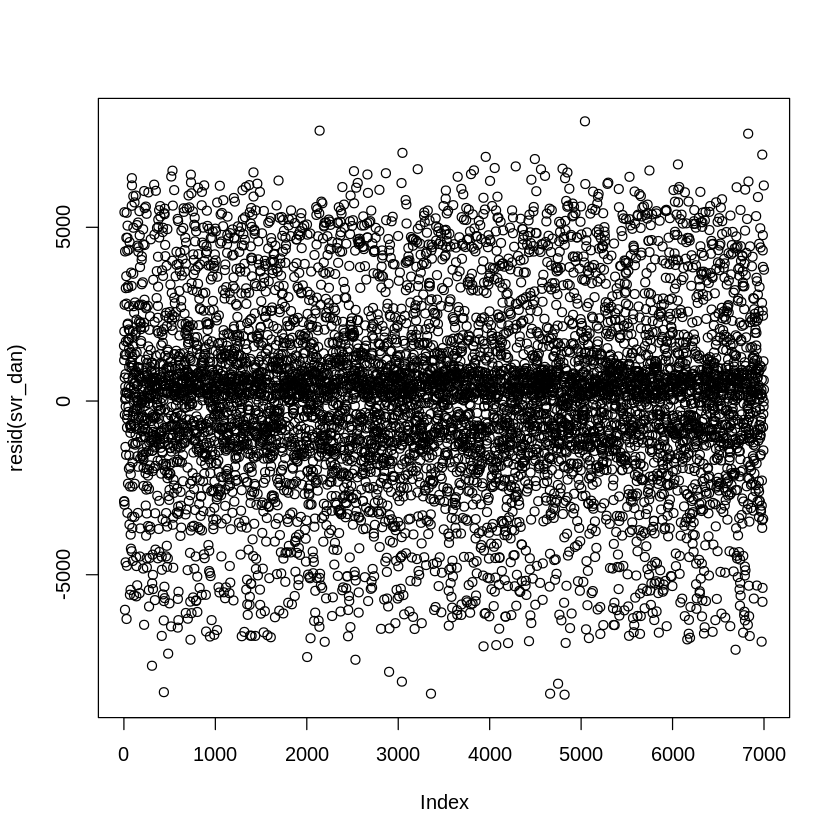

In [ ]:
plot(resid(svr_dan))

In [ ]:
head(tahmin)

36311     73364     68373     68848      1064     44680 
 9497.964 12357.806  6807.301 11383.309 17828.599  5095.719

In [ ]:
#Algoritmaları karşılaştıracağız.

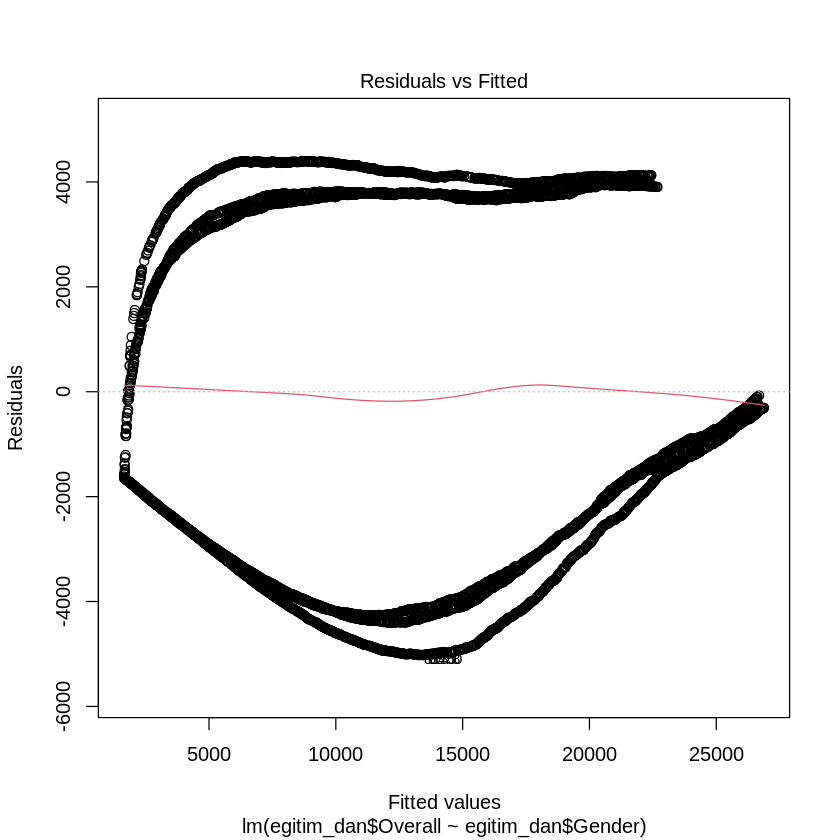

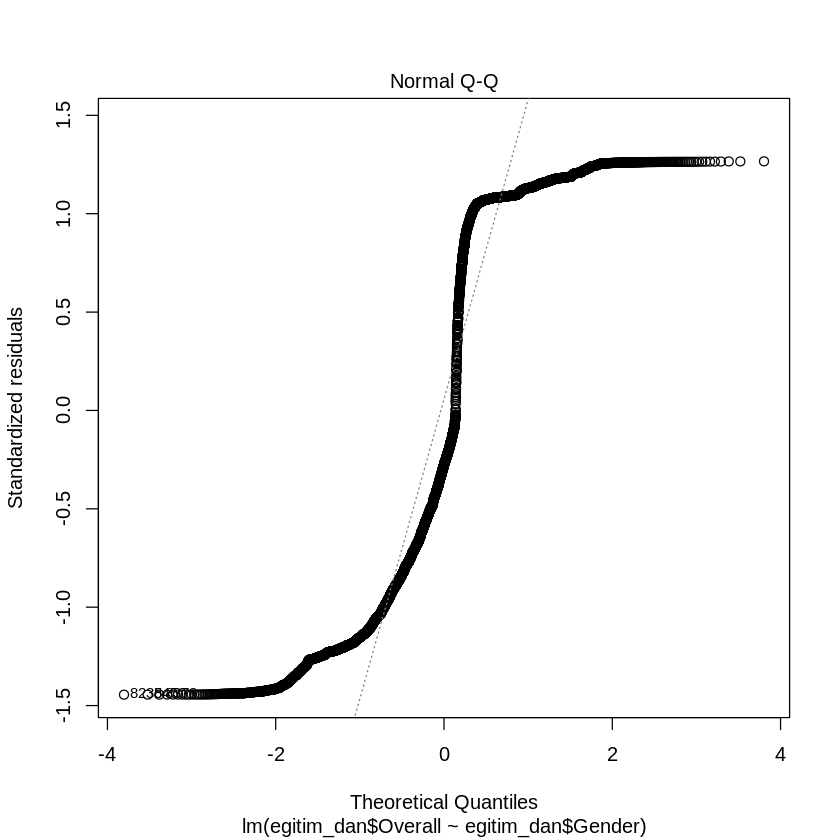

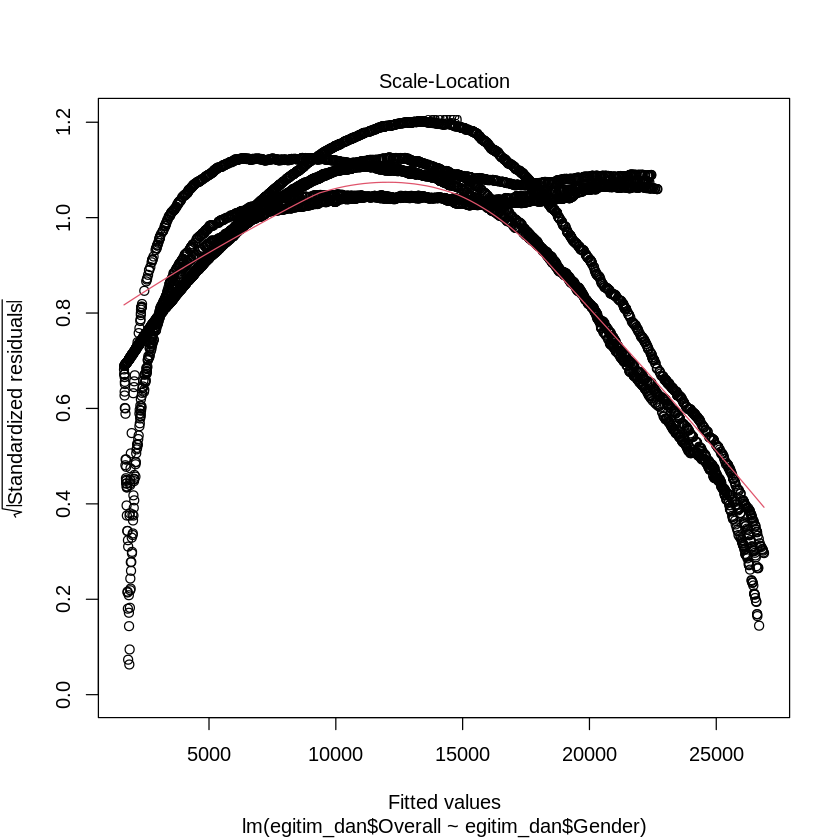

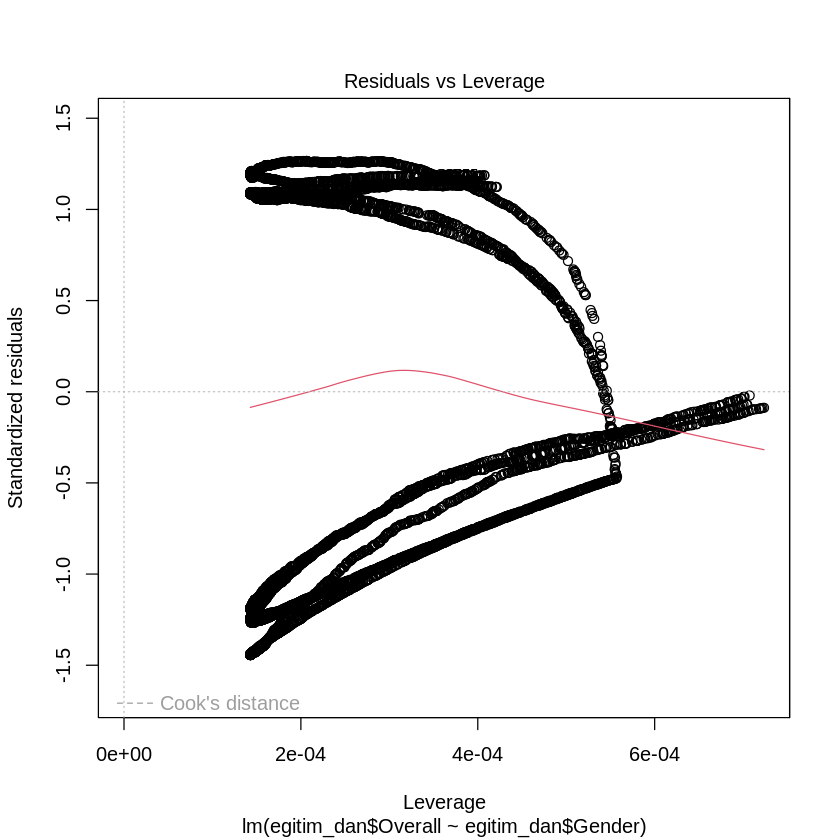

In [ ]:
plot(lineer_dan)

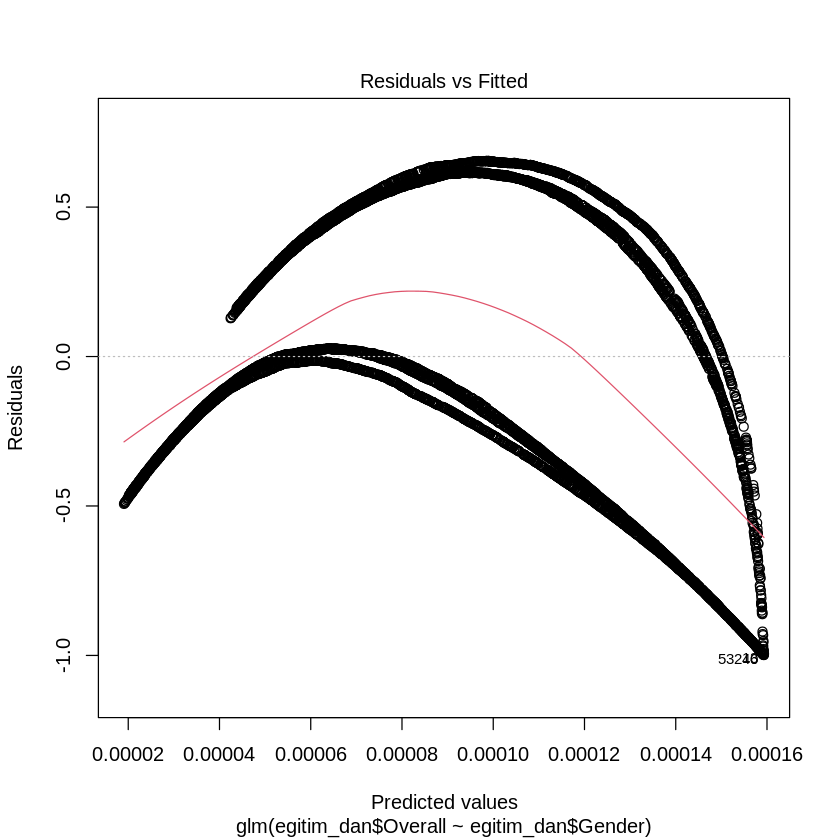

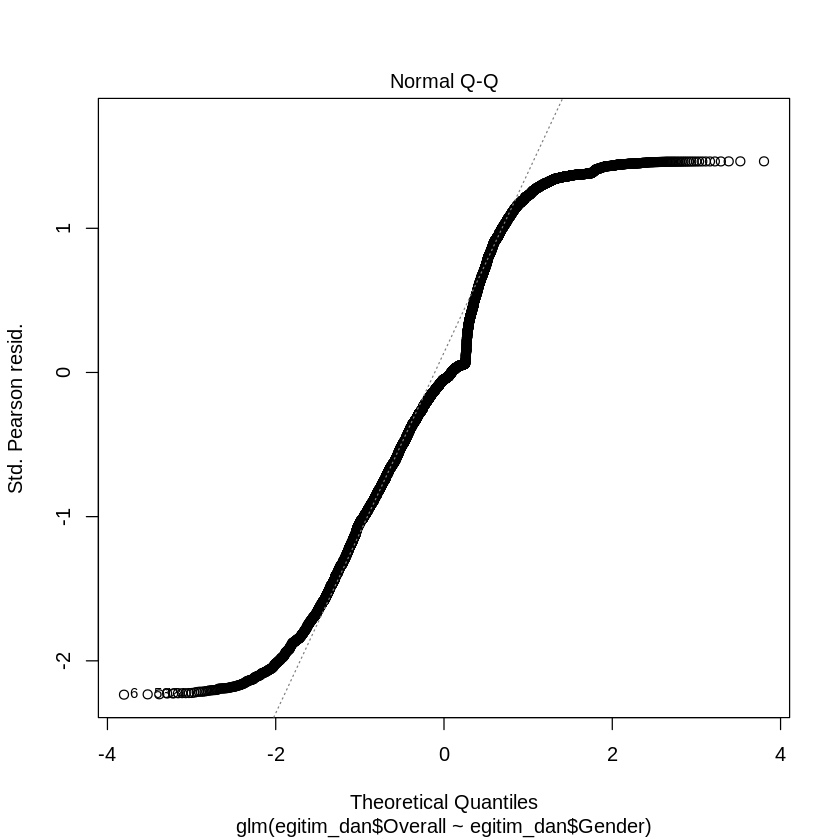

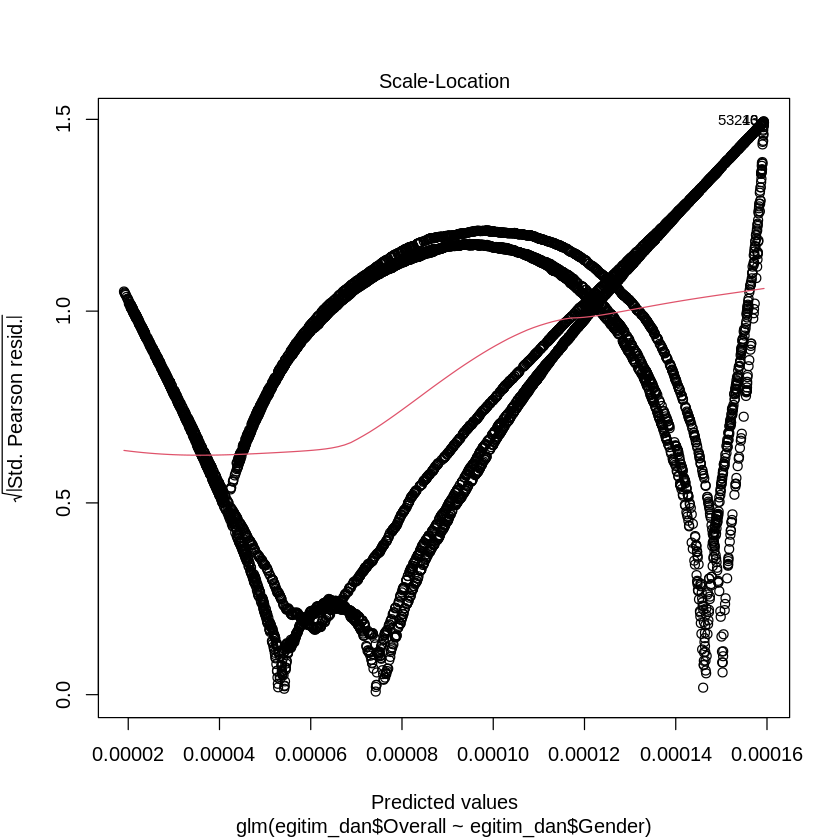

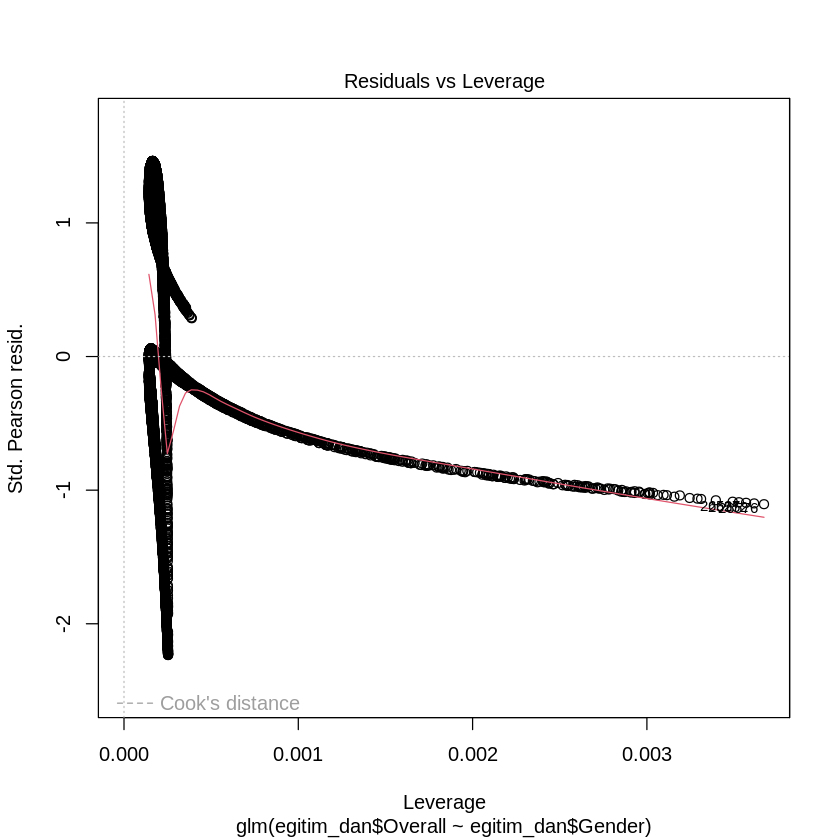

In [ ]:
plot(logistic_dan)

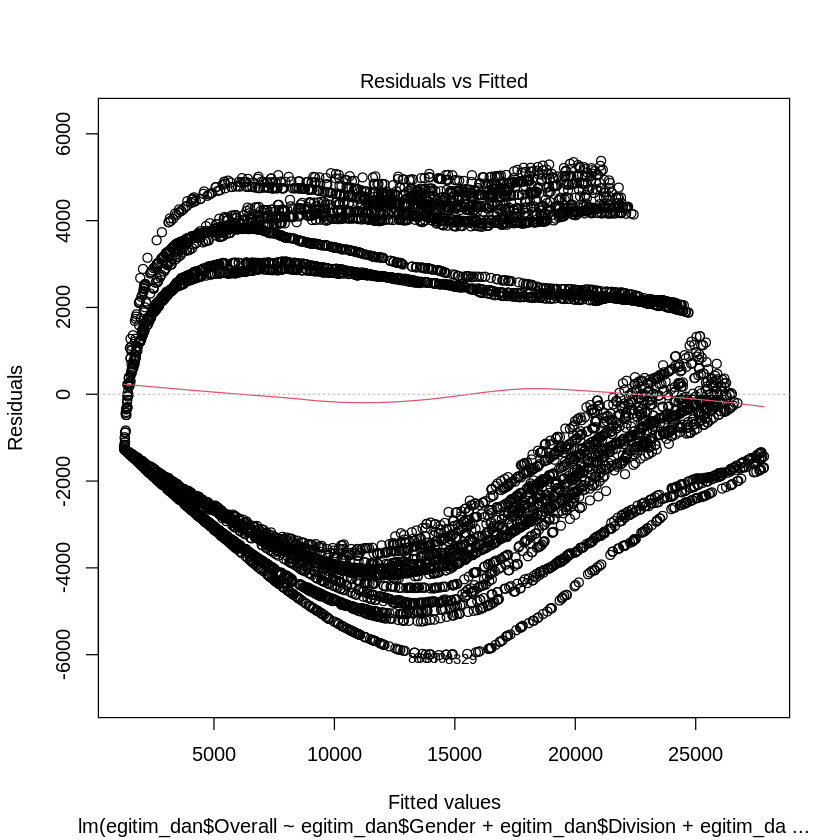

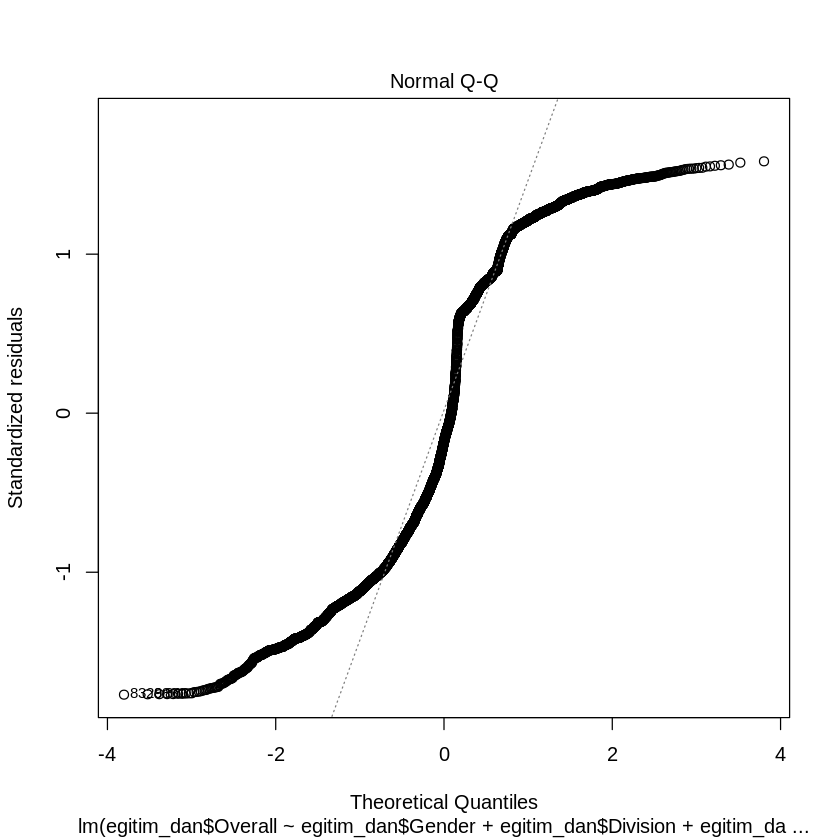

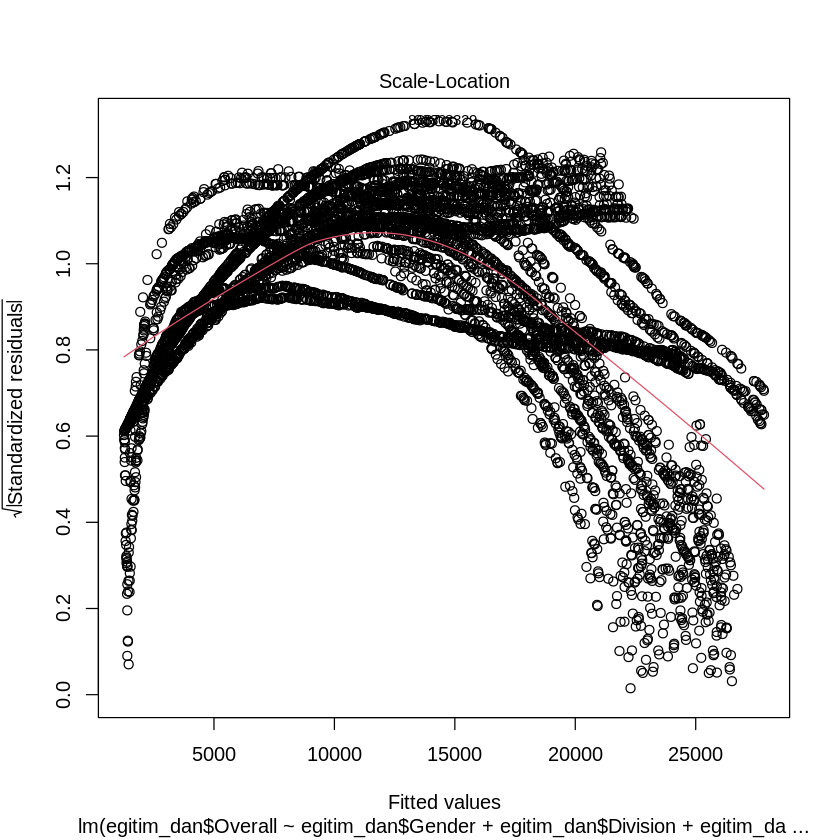

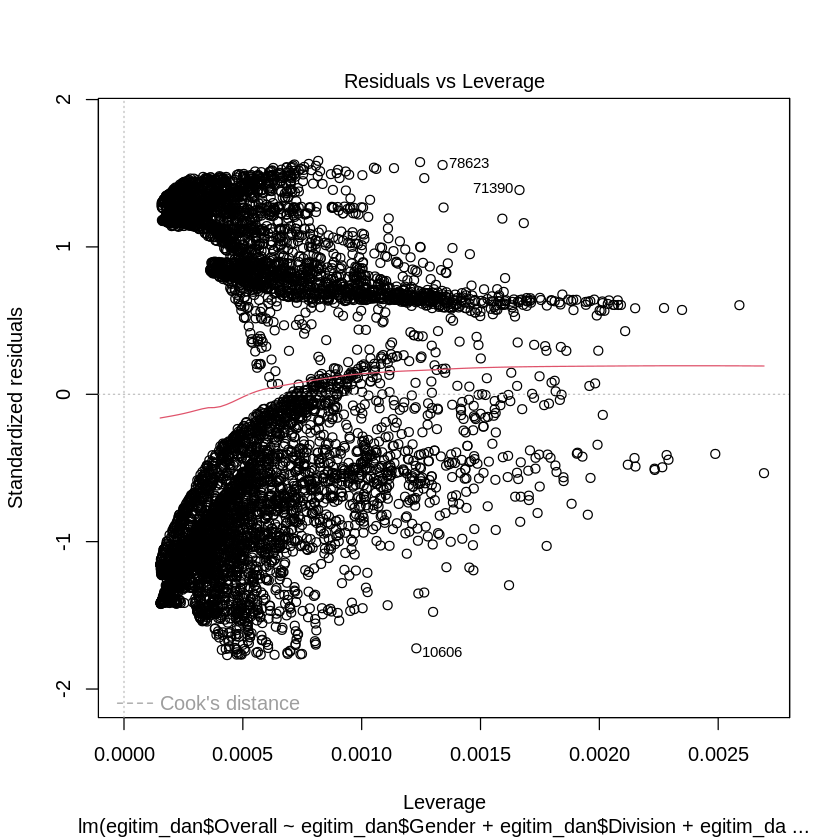

In [ ]:
plot(multiple_dan)

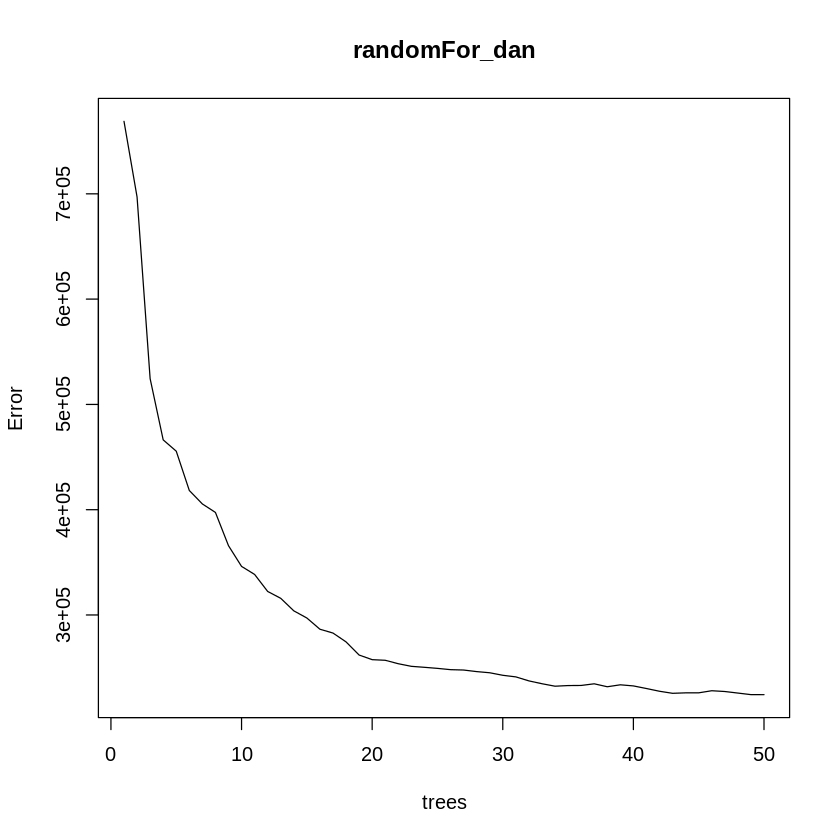

In [ ]:
plot(randomFor_dan)

In [ ]:
plot(svr_dan)